In [2]:


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('whitegrid', {'font.sans-serif': ['simhei', 'Arial']})


In [19]:
# seaborn 使用的 相关资料路径 api
def get_file_path(file_name):
    import os
    project_path = os.path.dirname(os.getcwd())
    note_path = r"{}\data\seaborn_data\{}".format(project_path, file_name)

    return note_path


In [20]:
from util.note_parser import *
from util.parser import get_data
volume1_file_path = get_file_path('volume1.txt')
volume2_file_path = get_file_path('volume2.txt')

# 获取 第一, 二卷小说 以每章划分为单位的 list
volume1_chapter_list = get_chapter_list(volume1_file_path)
volume2_chapter_list = get_chapter_list(volume2_file_path)

# 打印每卷 章节数
print("volume1 chapter count: {}".format(len(volume1_chapter_list)))
print("volume2 chapter count: {}".format(len(volume2_chapter_list)))

# 设置 保存csv 路径以及文件名
volume1_chapter_csv_path = get_file_path('volume1_discrete_chapter_word.csv')
volume2_chapter_csv_path = get_file_path('volume2_discrete_chapter_word.csv')

# 保存
save_chapter_count_to_csv_file(volume1_chapter_list, volume1_chapter_csv_path)
save_chapter_count_to_csv_file(volume2_chapter_list, volume2_chapter_csv_path)


volume1 chapter count: 29
volume2 chapter count: 45
ok! csv_file => C:\Users\Administrator\projects\python\matplotlib_vision\data\seaborn_data\volume1_discrete_chapter_word.csv
ok! csv_file => C:\Users\Administrator\projects\python\matplotlib_vision\data\seaborn_data\volume2_discrete_chapter_word.csv


In [22]:
# 保存 第一, 二卷 分词统计 (以卷为单位) 为csv文件
volume1_count_csv_file_path = get_file_path("volume1_split_word.csv")
volume2_count_csv_file_path = get_file_path("volume2_split_word.csv")
save_volume_count_to_csv_file(volume1_file_path, volume1_count_csv_file_path)
save_volume_count_to_csv_file(volume2_file_path, volume2_count_csv_file_path)


In [23]:


df = pd.read_csv(get_file_path('volume2_discrete_chapter_word.csv'))

print(df)


       Unnamed: 0  chapter  word  count
0               0        1    一下      1
1               1        1    一个     12
2               2        1  一个劲地      1
3               3        1    一些      1
4               4        1   一会儿      1
...           ...      ...   ...    ...
38342       38342       45    黑人      1
38343       38343       45    黑发      1
38344       38344       45    黑色      2
38345       38345       45    鼻孔      2
38346       38346       45    齐步      1

[38347 rows x 4 columns]


In [12]:
# plot1 关于 第二卷主要人物在每个章节出现的次数统计, 以热量图显示展现
name_list = ['道静', '江华', '郑瑾', '晓燕', '姑母', '侯瑞', '徐辉', '大娘', '李奎英',]
sieve = df.loc[df['word'].isin(name_list)]

sieve = sieve.pivot(index="word", columns="chapter", values="count")

sieve = sieve.replace(np.nan, 0)

print(sieve)



chapter    1     2     3     4     5     6     7     8     9     10  ...  \
word                                                                 ...   
侯瑞        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
大娘        0.0   0.0   0.0   0.0   0.0   0.0  14.0   2.0  30.0   1.0  ...   
姑母        0.0   1.0   1.0   0.0   0.0  19.0  50.0  29.0  20.0   2.0  ...   
徐辉        9.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
晓燕        1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
江华       40.0  60.0  22.0   8.0   2.0   5.0   2.0   1.0   0.0   0.0  ...   
道静       36.0  54.0   3.0  30.0  24.0  31.0  59.0  49.0  30.0  23.0  ...   
郑瑾        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

chapter    36    37    38    39    40    41    42   43   44    45  
word                                                               
侯瑞       13.0   0.0  14.0   1.0   0.0   5.0   0.0  1.0  0.0   6.0  
大娘        0.0   0.0   0.0   0.0   0

<AxesSubplot:xlabel='chapter', ylabel='word'>

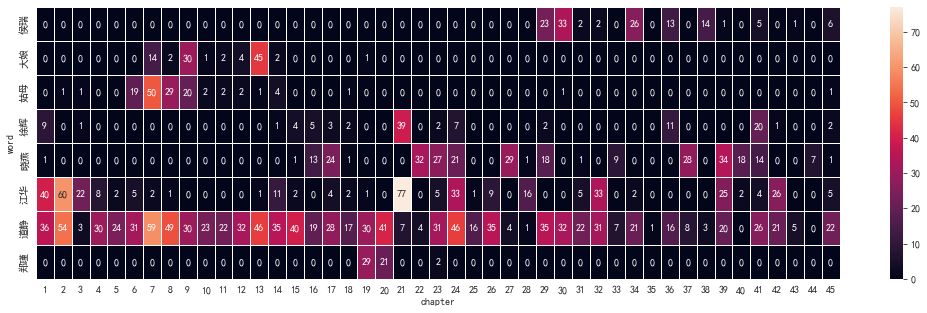

In [13]:
f, ax = plt.subplots(figsize=(18, 5))
sns.heatmap(sieve, annot=True, linewidths=.5, ax=ax)
